In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from IPython.display import display, Image
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter('ignore')


%pylab inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

Populating the interactive namespace from numpy and matplotlib


In [2]:
hr = pd.read_csv('HR.csv')

In [3]:
hr.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [4]:
def set_sal(x):
    if x == 'high':
        return 1
    elif x == 'medium':
        return 0
    else:
        return -1

In [5]:
hr['salary'] = hr['salary'].apply(set_sal)

In [6]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,-1
1,0.80,0.86,5,262,6,0,1,0,sales,0
2,0.11,0.88,7,272,4,0,1,0,sales,0
3,0.72,0.87,5,223,5,0,1,0,sales,-1
4,0.37,0.52,2,159,3,0,1,0,sales,-1


In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [8]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,-0.405294
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
salary                     0.00
dtype: float64

In [10]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,-1.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Можно видеть, что в компании не очень большой уровень удовлетворенности работой, однако за последнее оценивание он немного повысился.
Невысокий уровень оценки работы можно объяснить высокой нагрузкой на работе. Среднее время работы в день - 10 часов,среднее количество проектов на человека 3.Людей могут отпугивать высокие нагрузки.
Можем видеть, что люди примерно дорабатывают до 4 лет в компании (75% людей проработали 4 и меньше года в компании), а потом многие из них уходят (опять же, исходя из того, что большинство сотрудников имеют меньше 4 лет опыта работы в компании).  При этом, срднее время в компании - 3 года, то есть 3-4 года - это некоторый рубеж, после которого много сотрудников уходят.  То есть, сотрудники не убегают в первый же год, а дорабатывают до приличного срока в компании, а потом уходят. Значит возможно, причины ухода надо искать более глобальные, связанные с долгосрочными перспективами. Опять же, одной из такие причин может являться чрезмерная  нагрузка, которую упоминали выше, люди просто не могут так сильно работать в течение долгого периода.
Еще одной из причин, почему люди, проработавшие достаточно большое количество времени в компании, уходят, может являться низкое количество повышений - их практически нет.
Ну и конечно же, главная причина низких оценок - маленькая зп. Большинство сотрудников получают зп, помеченную категорие low: 75% сотрудников получают low зп. Это очень плохой показатель.

Посмотрим на эти показатели в разрезе департаментов.

In [11]:
sales_lst = hr.sales.value_counts().reset_index()['index'].tolist()
sales_lst

['sales',
 'technical',
 'support',
 'IT',
 'product_mng',
 'marketing',
 'RandD',
 'accounting',
 'hr',
 'management']

In [12]:
for dep in sales_lst:
    print(dep)
    print("Department of company: %s" % dep)
    print("Total employee count in this department: %d \n" % hr[hr['sales']==dep].shape[0])
    print("Total employee left in this department: %d \n"% hr[(hr['sales']==dep) & (hr['left'] == 1)].shape[0])
    print(hr[hr['sales']==dep].describe())

sales
Department of company: sales
Total employee count in this department: 4140 

Total employee left in this department: 1014 

       satisfaction_level  last_evaluation  number_project  \
count         4140.000000      4140.000000     4140.000000   
mean             0.614447         0.709717        3.776329   
std              0.250251         0.171459        1.242798   
min              0.090000         0.360000        2.000000   
25%              0.430000         0.550000        3.000000   
50%              0.640000         0.700000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident         left  \
count           4140.000000         4140.000000    4140.000000  4140.000000   
mean             200.911353            3.534058       0.141787     0.244928   
std               49.560393            1.512307       0.348874     0.43009


Total employee left in this department: 121 

       satisfaction_level  last_evaluation  number_project  \
count          787.000000       787.000000      787.000000   
mean             0.619822         0.712122        3.853875   
std              0.245269         0.165093        1.164682   
min              0.090000         0.360000        2.000000   
25%              0.470000         0.565000        3.000000   
50%              0.650000         0.710000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident        left  \
count            787.000000          787.000000     787.000000  787.000000   
mean             200.800508            3.367217       0.170267    0.153748   
std               49.253223            1.214247       0.376106    0.360937   
min               98.000000            2.000000       0.000000    0.000000   
25% 

Можем видеть, что выше среднего satisfaction_level у management, ниже среднего (61%) у hr, accounting и technical.
Меньше всего уходят management, больше всего accounting(26%, работают выше среднего, имеют низкий уровень оценки работы), hr(29%, при этом они меньше остальных работают и имеют меньше срденего уровень оценки работы), support(имеют ниже срденего зп,при этом работают на равне со средним по департаментам, повышение ниже среднего), technical - примерно такая же ситуация, как и в support. Можно заметить, что в отделах с самыми плохими условиями и низкой оценкой, текучка выше - больше людей с меньшим стажем работы в компании.
Можем видеть, что больше всего сотрудников работается в sales.
Больше всего работников, причем с большим отрывом, ушло в sales.

In [18]:
pd.crosstab(hr['left'],hr['promotion_last_5years'],normalize='columns')

promotion_last_5years,0,1
left,,
0,0.758038,0.940439
1,0.241962,0.059561


Можем видеть, что доля тех, кто ушел среди людей, получивших повышение меньше, чем среди тех, кто его не получил.

In [20]:
pd.crosstab(hr['left'],hr['sales'],normalize='columns')

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,0.777506,0.846252,0.734029,0.709066,0.855556,0.763403,0.780488,0.755072,0.751009,0.74375
1,0.222494,0.153748,0.265971,0.290934,0.144444,0.236597,0.219512,0.244928,0.248991,0.25625


Можем видеть, что больше всего доля людей, которые ушли, от общего числа людей в департаменте в hr, на втором -accounting, далее technical, далее suport и sales. Меньше всего в RandD и management.

In [21]:
pd.crosstab(hr['left'],hr['salary'],normalize='columns')

salary,-1,0,1
left,,,
0,0.703116,0.795687,0.933711
1,0.296884,0.204313,0.066289


Можем видеть, что доля тех, кто ушел среди сотрудников с высокой зп (1) значительно меньше, чем средит среднее и низкой. Также эта доля меньше для людей со средней зп, по сравнению с людьми с низкой зп.

In [22]:
pd.crosstab(hr['left'],hr['time_spend_company'],normalize='columns')

time_spend_company,2,3,4,5,6,7,8,10
left,,,,,,,,
0,0.983662,0.753841,0.651936,0.434487,0.708914,1.0,1.0,1.0
1,0.016338,0.246159,0.348064,0.565513,0.291086,0.0,0.0,0.0


Можем видеть, что после 4 года работы доля тех, кто ушел резко повышается. Скорее всего на это сильно влияет отсутсвие повышения.

In [26]:
pd.crosstab(hr['left'],hr['number_project'],normalize='columns')

number_project,2,3,4,5,6,7
left,,,,,,
0,0.343802,0.982244,0.9063,0.778341,0.442078,0.0
1,0.656198,0.017756,0.0937,0.221659,0.557922,1.0


Интересно, что доля тех, кто ушел, наиболее высокая для людей с 2 и >5 проектами. Наверно 2 проекта людей не так сильно могут заинтересовать, а уже больше 5 - большая нагрузку. Также можно заметить, что люди с 7 проектами ушли все.

Проиллюстрируем сказанное выше графиками:

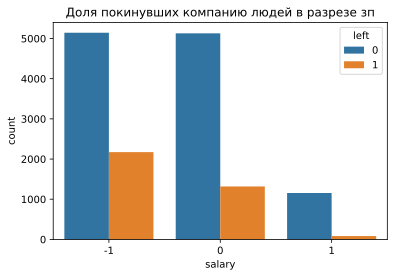

In [33]:
sns.countplot(x='salary', hue='left', data=hr)
plt.title('Доля покинувших компанию людей в разрезе зп');

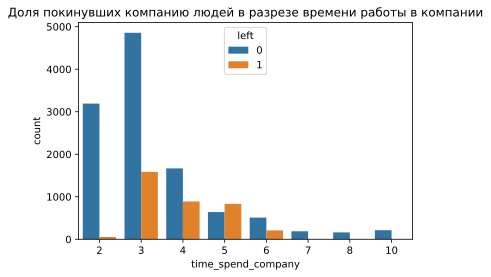

In [36]:
sns.countplot(x='time_spend_company', hue='left', data=hr)
plt.title('Доля покинувших компанию людей в разрезе времени работы в компании');

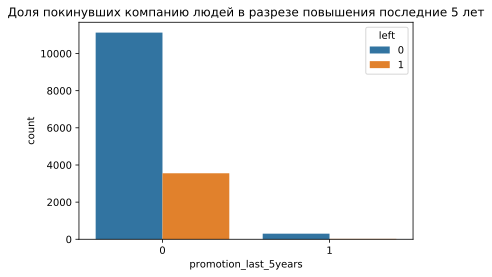

In [35]:
sns.countplot(x='promotion_last_5years', hue='left', data=hr)
plt.title('Доля покинувших компанию людей в разрезе повышения последние 5 лет');

Теперь давайте попробуем сделать простое предсказание ухода сотрудника, основывая на только что полученных инсайтах.Для этого создадим бинарные переменную: 

In [80]:
hr['spent_over_4'] = (hr['time_spend_company'] > 3).astype('int')
hr['low_salary'] = (hr['salary'] < 0).astype('int')
hr['many_pr'] = (hr['number_project'] >= 5).astype('int')

In [81]:
pd.crosstab(hr['spent_over_4'] & hr['low_salary'] & ~hr['promotion_last_5years'] & hr['many_pr']  , hr['left'])

left,0,1
row_0,,
0,10995,2685
1,433,886


Правильность нашей модели составила 79.2%, что уже достаточно неплохо, учитывая что никакие модели ml мы не строили. То есть, руководствуясь правилом: низкая зп, больше 3 лет в компании, больше 5 проектов, нет промоушенов, мы с можем с вероятностью 79% предсказать уход человека.

## Рассчитать и визуализировать корреляционную матрицу для переменных

In [99]:
corr = hr.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,spent_over_4,low_salary,many_pr
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,-0.201934,-0.047415,-0.204713
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,0.244684,0.005221,0.213718
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,0.388753,-0.002504,0.807968
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,0.267598,-0.001050,0.279077
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,0.770534,-0.040110,0.183774
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,-0.020677,-0.006813,-0.021993
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,0.218415,0.134722,0.183220
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,0.017415,-0.082832,-0.019706
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,-0.003737,-0.910803,-0.017353
spent_over_4,-0.201934,0.244684,0.388753,0.267598,0.770534,-0.020677,0.218415,0.017415,-0.003737,1.000000,-0.001956,0.334513


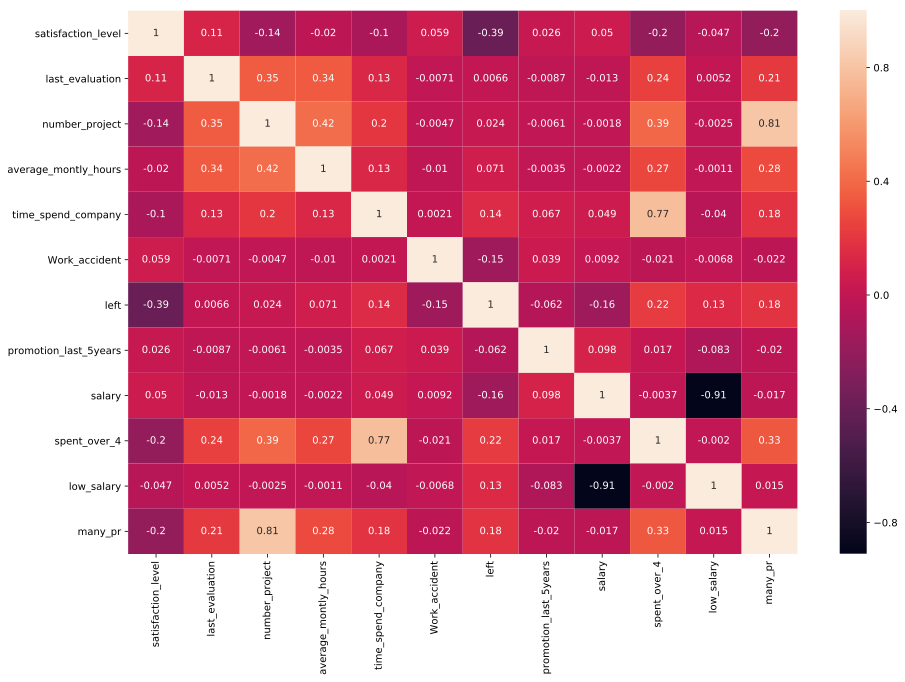

In [100]:

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);


Можно видеть, что индикатор left достаточно сильно негативно коррелирует с уровнем удовлетворенности работой, что вполне объяснимл. Также выше остальных left положительно коррелирует с стажем в компании. То есть, возможно, есть некая зависимость, что сотредники, которые дольше работают в компании, менее вероятнее уйдут. Сильно положительно коррелируют количество рабочих часов в месяце и количество проектов. Интересна зависимость количества рабочих часов в месяц и уровень последней оценки работы.Можно предположить, что чем выше оценка, тем больше человек проводит времени на работе, то есть, можно предположить, что больше работают те, кому работа их работа нравится.

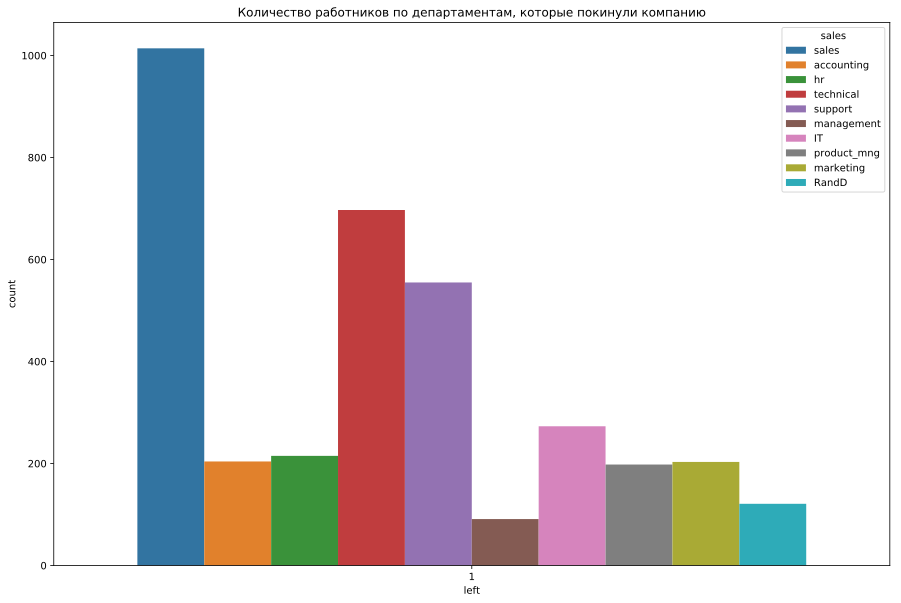

In [120]:
sns.countplot(x='left',hue='sales', data=hr, order = hr.left.value_counts().iloc[1:].index)

plt.title('Количество работников по департаментам, которые покинули компанию');

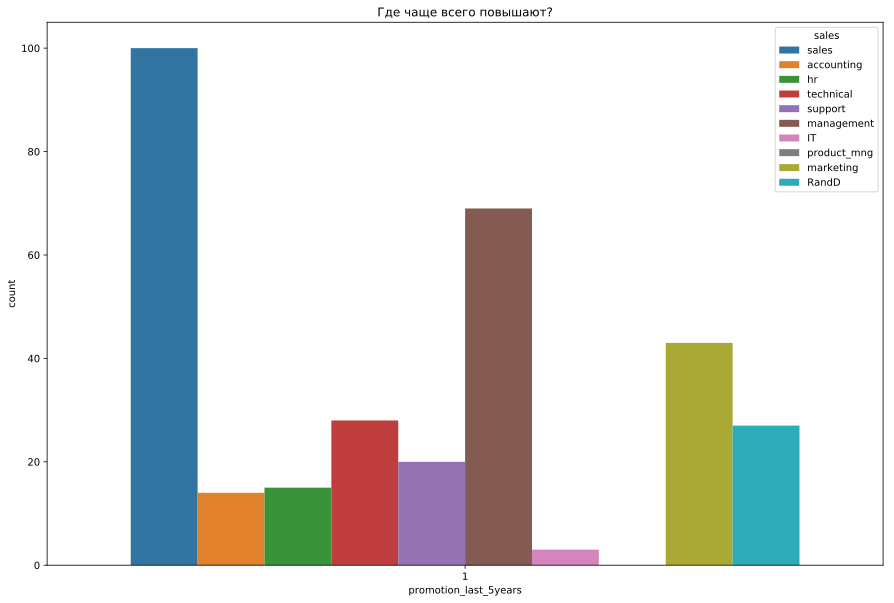

In [122]:
sns.countplot(x='promotion_last_5years',hue='sales', data=hr,order = hr['promotion_last_5years'].value_counts().iloc[1:].index)

plt.title('Где чаще всего повышают?');

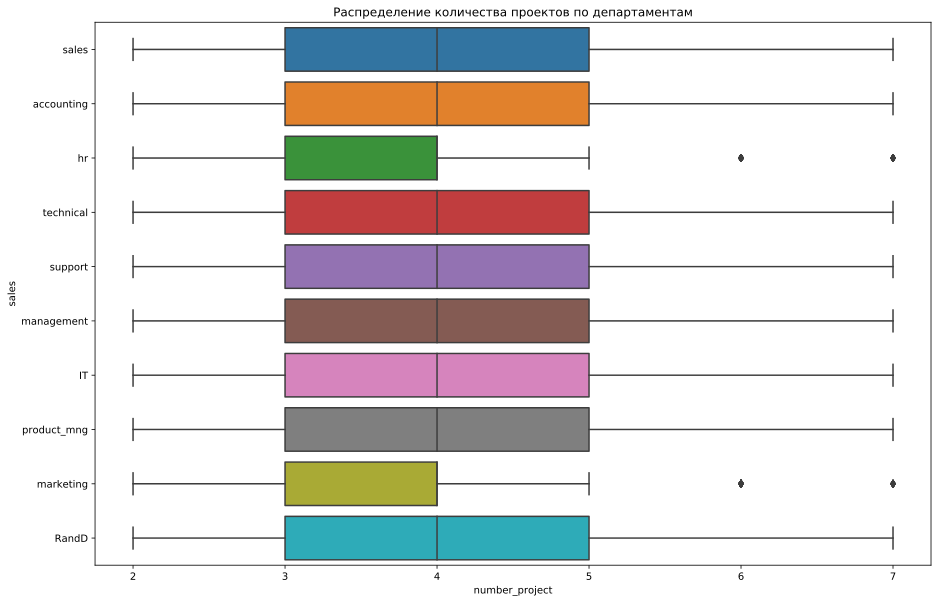

In [125]:
sns.boxplot(x='number_project', y='sales', 
            data=hr)
plt.title('Распределение количества проектов по департаментам');

Видим, что из привычной картины выбивается отдел маркетинга и hr, в которых работники меньше остальных загружены проектами.

## Показать распределение сотрудников по зарплатам

In [27]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

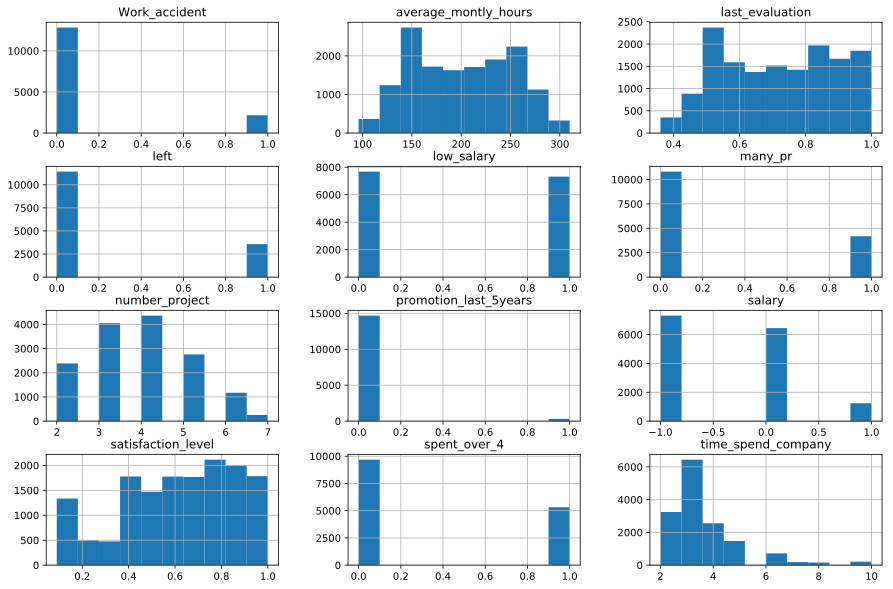

In [95]:
hr.hist();

Можем видеть, что зп в основном низкие.
Также по графикам ясно видим, что много сотрудников уходит. Пожтверждается наша гипотеза о том, что многие дорабатывают до 3-4 лет и уходят. Можем увидеть, что последняя оценка скорее отрицательная - много низких оценок.
Интересная картина у satisfaction_level. Существует достаточное количество очень негативных оценок.

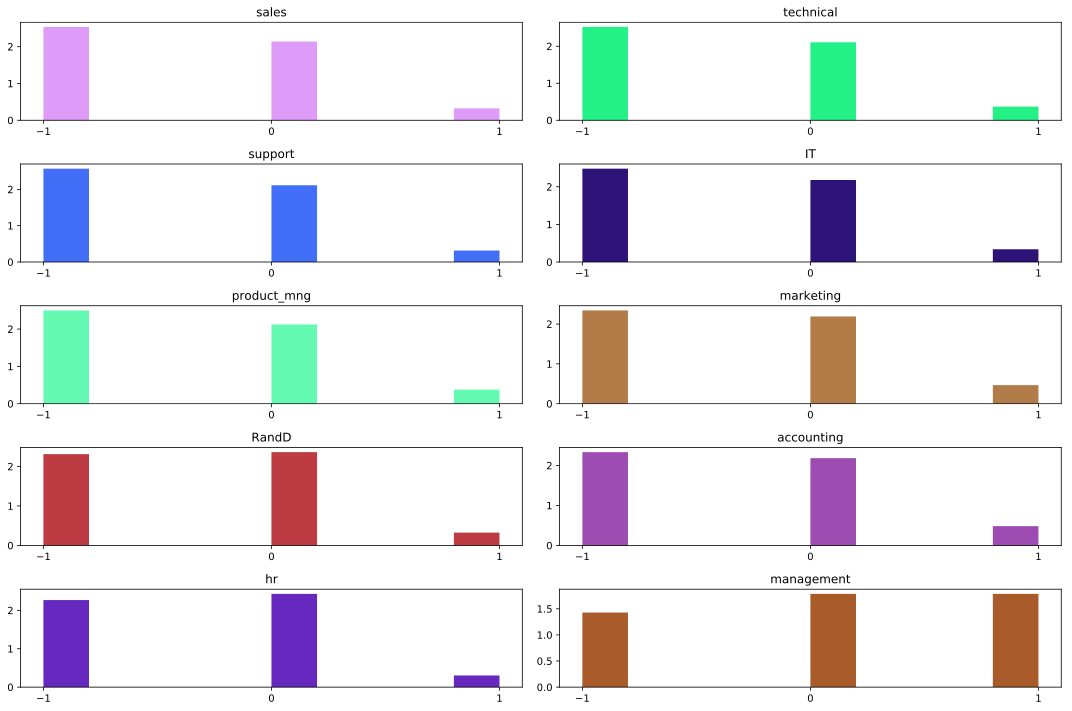

In [96]:
fig, axes = plt.subplots(5,2)
for dep, ax in zip(sales_lst, axes.ravel()):
    ax.hist(hr[hr['sales']==dep]['salary'],color=numpy.random.rand(3,), normed=True)
    ax.set_title(dep)
    ax.set_xticks([-1,0,1])
plt.tight_layout()

Как уже отмечалось выше, больше всего зп у management. Хуже всего платят support, accounting, technical, product_mng, sales.

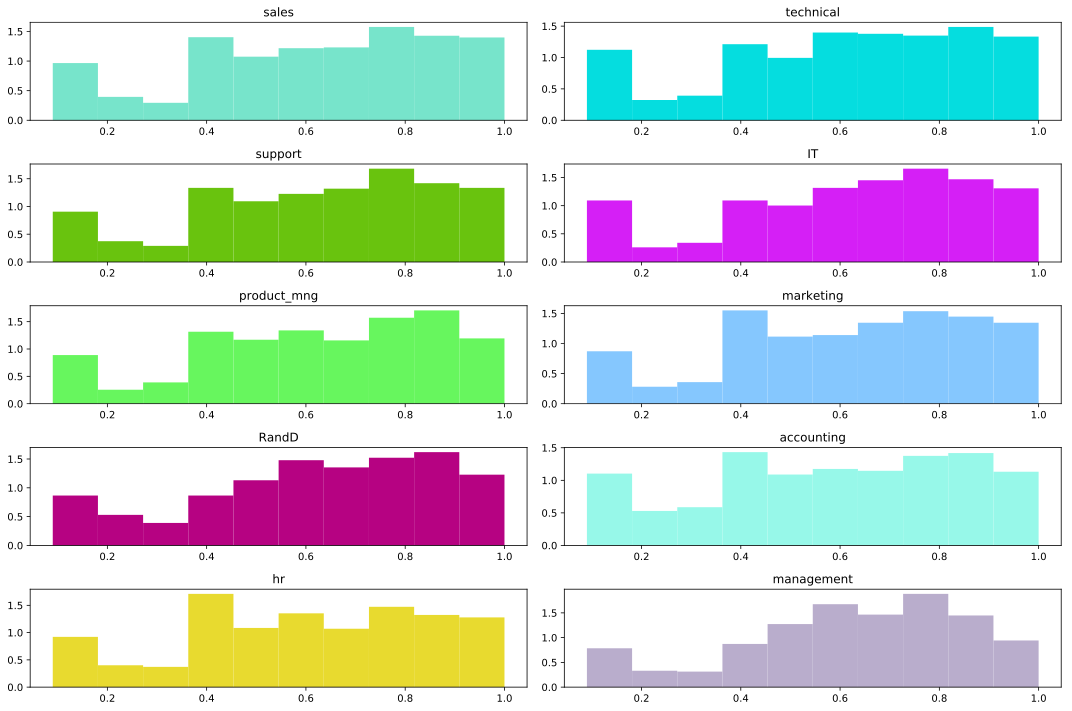

In [97]:
fig, axes = plt.subplots(5,2)
for dep, ax in zip(sales_lst, axes.ravel()):
    ax.hist(hr[hr['sales']==dep]['satisfaction_level'],color=numpy.random.rand(3,), normed=True)
    ax.set_title(dep)
    
plt.tight_layout()

Можем виеть, что marketing accounting и hr больше всех имеют низкий уровень удовлетворенности - много оценок 0.4. Больше всего оценок 0.4 у hr.ь
Во всех департаментах можем видеть, что  самые низкие оценки формируют еще одну группу часто встречающихся оценок. Это может говорить, что во всех департаментах присутсвует весомая доля достаточно сильно недовльных сотрудников.

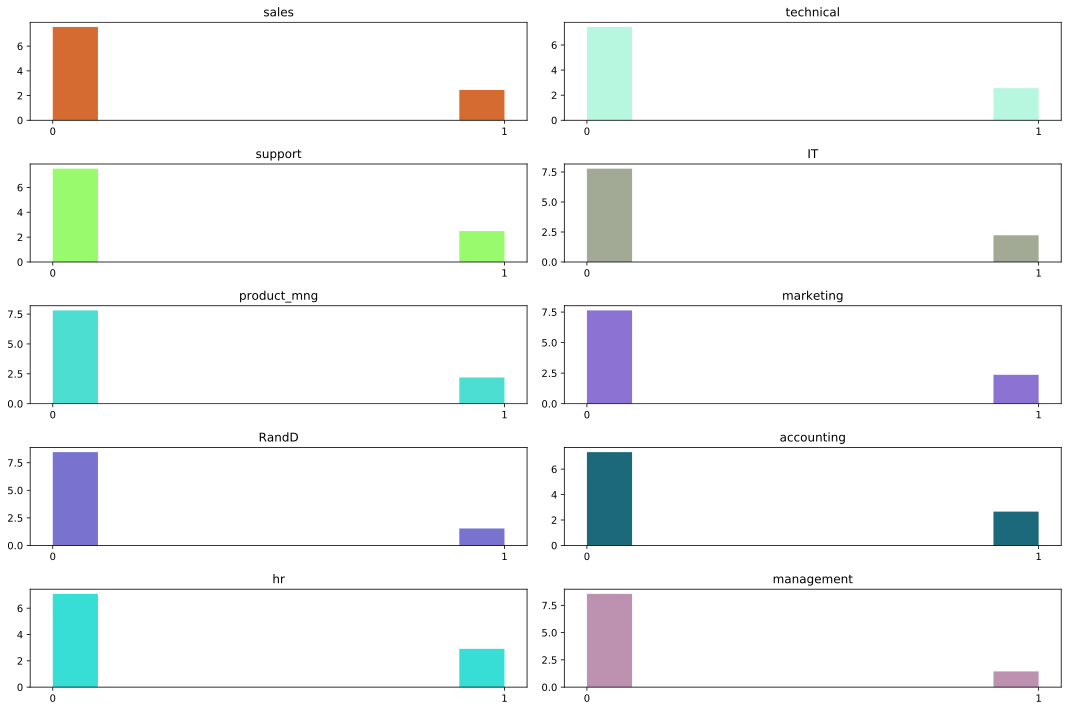

In [98]:
fig, axes = plt.subplots(5,2)
for dep, ax in zip(sales_lst, axes.ravel()):
    ax.hist(hr[hr['sales']==dep]['left'],color=numpy.random.rand(3,), normed=True)
    ax.set_title(dep)
    ax.set_xticks([0,1])
    
plt.tight_layout()

Выше всего доля ушедших по отношению к оставшимся в hr, accounting.

In [93]:
print('Total left in company %d' %(hr[hr['left'] == 1].shape[0]))

Total left in company 3571


## Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию

In [82]:
left = hr[hr['left'] == 1]
_left = hr[hr['left'] == 0]

In [83]:
import scipy.stats as sts

In [84]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'spent_over_4',
       'low_salary', 'many_pr'],
      dtype='object')

In [85]:
sts.ttest_ind(left['time_spend_company'], _left['time_spend_company'])

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)

Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически начимое различие между средним временем работы в компании людей, которые ушли, и людей, которые остались работать

In [100]:
sts.ttest_ind(left['salary'], _left['salary'])

Ttest_indResult(statistic=-19.5821662617097, pvalue=2.4752381718177705e-84)

    Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически начимое различие между средней зп в компании людей, которые ушли, и людей, которые остались работать

In [101]:
sts.ttest_ind(left['average_montly_hours'], _left['average_montly_hours'])

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

    Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически начимое различие между средними часами работы в месяц в компании людей, которые ушли, и людей, которые остались работать

In [102]:
sts.ttest_ind(left['number_project'], _left['number_project'])

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)

    Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически начимое различие между средним количество проектов на работника в компании людей, которые ушли, и людей, которые остались работать

In [91]:
low_wg = hr[hr['salary'] == -1]
avg_wg = hr[hr['salary'] == 0]
high_wg = hr[hr['salary'] == 1]

In [92]:
sts.f_oneway(low_wg['left'],avg_wg['left'], high_wg['left'])

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

   Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически значимое различие между средними значениями целевой переменной left для людей с разной по категории зп.

In [108]:
l_wg =  hr[(hr['salary'] == -1) | (hr['salary'] == -0)]

In [109]:
sts.ttest_ind(l_wg['left'], high_wg['left'])

Ttest_indResult(statistic=14.918780298656008, pvalue=5.677176942019767e-50)

  Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически значимое различие между средними значениями целевой переменной left для людей с низкой зп (-1 0) и высокой зп.

In [112]:
has_prom = hr[hr['promotion_last_5years'] == 1]
_prom = hr[hr['promotion_last_5years'] == 0]

In [113]:
sts.ttest_ind(has_prom['left'], _prom['left'])

Ttest_indResult(statistic=-7.581195349367636, pvalue=3.6240472241469694e-14)

  Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически значимое различие между средними значениями целевой переменной left для людей, которые имели повышение за 5 лит и которые - нет

In [115]:
low_month = hr[hr['average_montly_hours'] < 200]
high_month = hr[hr['average_montly_hours'] >= 200]

In [116]:
sts.ttest_ind(low_month['left'], high_month['left'])

Ttest_indResult(statistic=-4.662662049469355, pvalue=3.1483597380393765e-06)

  Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически значимое различие между средними значениями целевой переменной left для людей, которые работают выше среднего в месяц и ниже среднего

In [123]:
high_project = hr[hr['number_project'] >= 3]
low_project = hr[hr['number_project'] < 3]

In [123]:
sts.ttest_ind(high_project['left'], low_project['left'])

Ttest_indResult(statistic=-57.85973131604253, pvalue=0.0)

  Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически значимое различие между средними значениями целевой переменной left для людей, которые участвуют в количестве проектов выше среднего и которые - нет.

In [127]:
mean_last_evaluation = hr['last_evaluation'].mean()
mean_sat_level = hr['satisfaction_level'].mean()
low_evaluation = hr[hr['last_evaluation']< mean_last_evaluation]
high_evaluation = hr[hr['last_evaluation']> mean_last_evaluation]
low_sat = hr[hr['satisfaction_level']< mean_sat_level]
high_sat = hr[hr['satisfaction_level']> mean_sat_level]

In [128]:
sts.ttest_ind(low_evaluation['left'], high_evaluation['left'])

Ttest_indResult(statistic=-3.1507692313976694, pvalue=0.0016316124644409412)

  Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически значимое различие между средними значениями целевой переменной left для людей с высокой последней оценкой и - нет.

In [132]:
sts.ttest_ind(low_sat['left'], high_sat['left'])

Ttest_indResult(statistic=38.46331535788125, pvalue=9.08931053313047e-309)

  Полученное pvalue меньше уровня значимости, что позволяет нам отклонить нулевую гипотезу: мы имеем статистически значимое различие между средними значениями целевой переменной left для людей с уровень удовлетворенностью работой выше среднего и - нет.

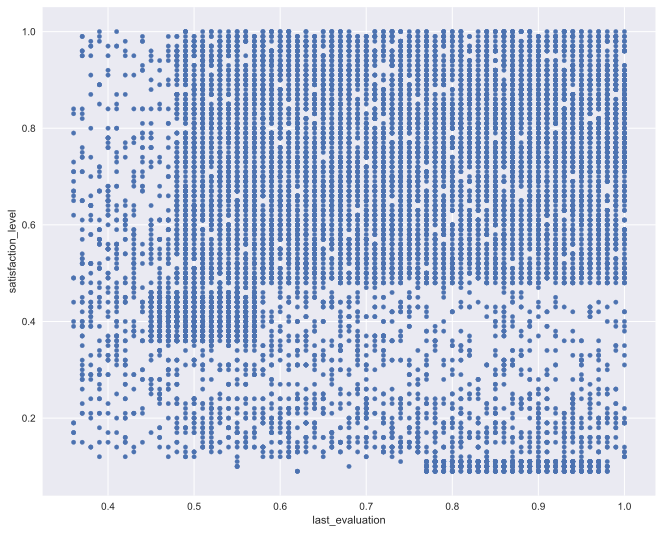

In [136]:
hr.plot(x='last_evaluation',y='satisfaction_level',kind='scatter')

# Вывод

Итого по проведенным тестам, построенным графикам и таблицам можем заключить, что компанию покидаю в основном из за низкой зп, высоких нагрузок и отсутствии карьерных перспектив. Типичный профиль сотрудника, который наиболее вероятно уйдет: работает больше 3 лет в компании, не имел повышения за эти три года, зарплата в низкой категории, ведет 5 или больше проектов и работает больше 200 часов в месяц.Необходимо более равномерно распределить нагрузку по сотрудникам, выделить средства на повышении зп (доведения среднего уровня зп до 0, сейчас -1), пересмотреть политику продвижения по карьерной лестнице в компании.Особенно стоит обратить внимание на ситуацию в отделах: hr, technical, suport, accounting.